###Q1. To start with, we'll need to compute the number of rentals per station per day. Use pandas to do that.

In [299]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Lasso

In [300]:
%matplotlib inline

In [301]:
usage = pd.read_table('data/usage_2012.tsv')

In [302]:
stations = pd.read_table('data/stations.tsv')

In [303]:
s = stations[['station']]

In [304]:
u = pd.concat([usage['station_start']], axis=1, keys=['station'])

In [305]:
counts = u['station'].value_counts()

In [306]:
c = DataFrame(counts.index, columns=['station'])

In [307]:
c['counts'] = counts.values

In [308]:
c['counts'] = c['counts'].apply(lambda x: x / 366)

In [309]:
m = pd.merge(s, c, on='station')

In [310]:
m.head()

,station,counts
0,20th & Bell St,4
1,20th & Crystal Dr,13
2,15th & Crystal Dr,8
3,Aurora Hills Community Ctr/18th & Hayes St,5
4,Pentagon City Metro / 12th & S Hayes St,11


###Q2.
###a. Our stations data has a huge number of quantitative attributes: fast_food, parking, restaurant, etc... Some of them are encoded as 0 or 1 (for absence or presence), others represent counts. To start with, run a simple linear regression where the input (x) variables are all the various station attributes and the output (y) variable is the average number of rentals per day.

In [311]:
stations_data = stations.merge(m, on='station')

In [312]:
df = DataFrame(stations_data.index, columns=['station'])
df['avg_rentals'] = m[['counts']]
df['station'] = m[['station']]
stations_vals = pd.merge(left=df, right=stations, on='station')

In [313]:
stations_vals

,station,avg_rentals,id,terminal_name,lat,long,no_bikes,no_empty_docks,fast_food,parking,...,museum,sculpture,hostel,picnic_site,tour_guide,attraction,landmark,motel,guest_house,gallery
0,20th & Bell St,4,1,31000,38.856100,-77.051200,7,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20th & Crystal Dr,13,3,31002,38.856400,-77.049200,9,6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15th & Crystal Dr,8,4,31003,38.860170,-77.049593,4,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aurora Hills Community Ctr/18th & Hayes St,5,5,31004,38.857866,-77.059490,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pentagon City Metro / 12th & S Hayes St,11,6,31005,38.862303,-77.059936,8,11,0,0,...,0,0,0,0,0,0,0,0,0,0
5,S Joyce & Army Navy Dr,10,7,31006,38.863700,-77.063300,7,3,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Crystal City Metro / 18th & Bell St,35,8,31007,38.857300,-77.051100,11,7,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12th & Army Navy Dr,10,9,31008,38.862900,-77.052800,3,7,0,0,...,0,0,0,0,0,0,0,0,0,0
8,27th & Crystal Dr,23,10,31009,38.848441,-77.051516,6,13,0,0,...,0,0,0,0,0,0,0,0,0,0
9,S Glebe & Potomac Ave,11,11,31010,38.842600,-77.050200,4,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [314]:
x = stations_vals[list(stations_vals.columns.values[8:])]
y = stations_vals[list(stations_vals.columns.values[1:2])]

In [317]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###b. Plot the predicted values (model.predict(x)) against the actual values and see how they compare.

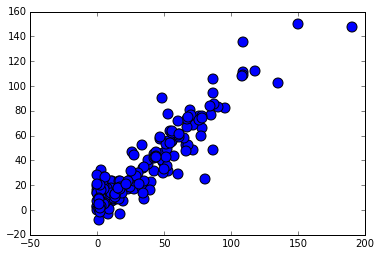

In [318]:
plt.scatter(y,lin_regr.predict(x), s=100)
plt.show()

In [334]:
np.int32(lin_regr.coef_)

array([[  2,   0,   0, -62,   2,  -4,   5,   1,   0,   0,   2,  68,   4,
          0,   0,   5,   0,   4,   9,  -3,   3, -37,  27, -38, -15,  21,
          1,   3,  -4,   8,  21,   0,   3,  12,   4,  -2, -34, -16,   5,
          5,  11,  -5, 147,  -5, -12, 182,   0,   0,  -6,  -8,  76,   5,
         -6, -18,  32,   9,  23,  54,  15,   5,  12, -18,  -2, -24, -26,
         17, -25, -16, -16, -20,  45, -85, -19,  12,   1,  34,  34, -14,
         37,  -3,  -3, 100,   0,  -8,  11,   0,   0, -11,   0,   0,  28,
          0,  15, -49,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         -1,   0,  40,   0,   0,  -4,  32,  12, -34,  -5,  17,   0,   3,
         -1,  -1,  -6,  -1, -94,   1, -22,  -2, -18, -21, -33,   7]], dtype=int32)

###d. Go back and split the data into a training set and a test set. Train the model on the training set and evaluate it on the test set. How does it do?

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)